# Imports

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_spd_matrix as make_spd_matrix

# Load Data

In [2]:
""" google drive """
from google.colab import drive
drive.mount('/content/drive')

"directory pahts"
directory_path = '/content/drive/MyDrive/ML_data_files/phase_1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.read_csv(directory_path + 'Image1.csv')[['0', '1']]
df2 = pd.read_csv(directory_path + 'Image2.csv')[['0', '1']]

df1 = df1.rename(columns={'0': 'x', '1': 'y'})
df2 = df2.rename(columns={'0': 'x', '1': 'y'})

# Part 1: Visulization

## Image1

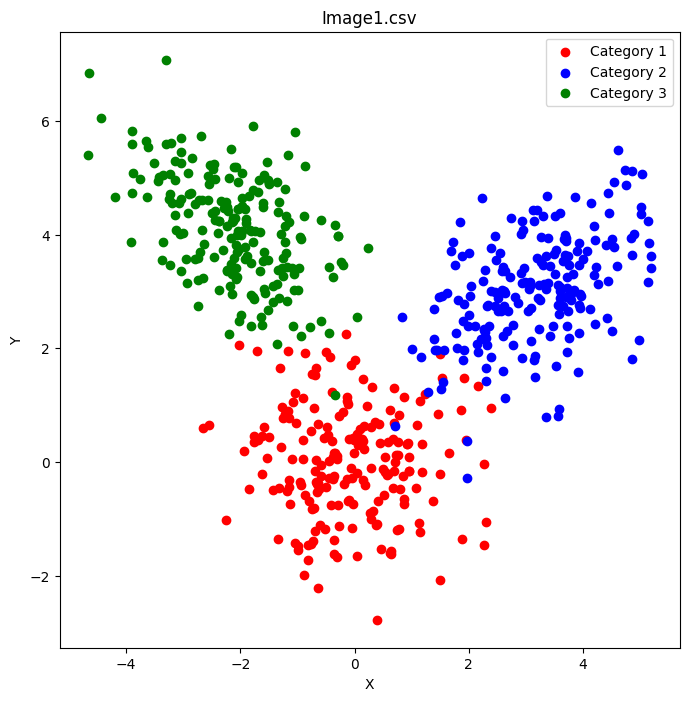

In [4]:
xs_1_1, ys_1_1 = np.array(df1[:200]['x']), np.array(df1[:200]['y'])
xs_1_2, ys_1_2 = np.array(df1[200:400]['x']), np.array(df1[200:400]['y'])
xs_1_3, ys_1_3 = np.array(df1[400:]['x']), np.array(df1[400:]['y'])

plt.figure(figsize=(8,8))
plt.scatter(xs_1_1, ys_1_1, color='r', label='Category 1')
plt.scatter(xs_1_2, ys_1_2, color='b', label='Category 2')
plt.scatter(xs_1_3, ys_1_3, color='g', label='Category 3')
plt.legend()
plt.title('Image1.csv')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Image2

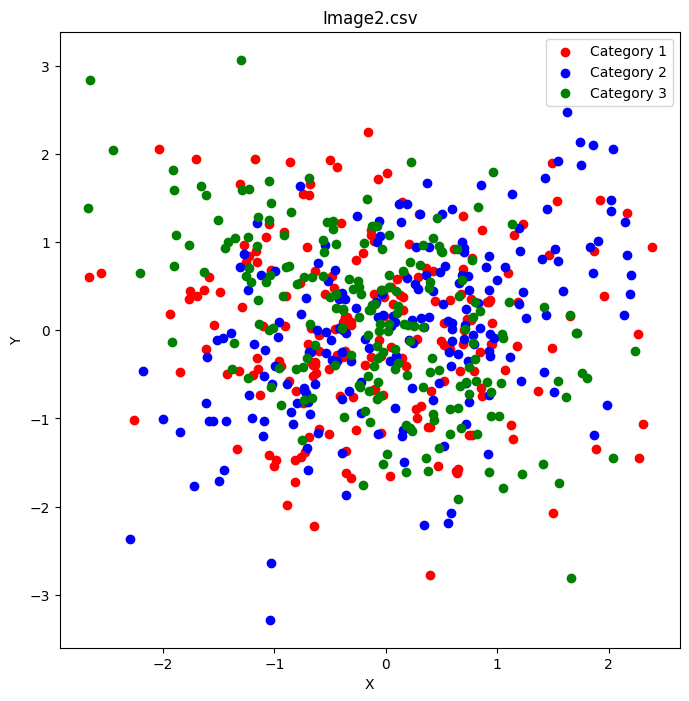

In [5]:
xs_2_1, ys_2_1 = np.array(df2[:200]['x']), np.array(df2[:200]['y'])
xs_2_2, ys_2_2 = np.array(df2[200:400]['x']), np.array(df2[200:400]['y'])
xs_2_3, ys_2_3 = np.array(df2[400:]['x']), np.array(df2[400:]['y'])

plt.figure(figsize=(8,8))
plt.scatter(xs_2_1, ys_2_1, color='r', label='Category 1')
plt.scatter(xs_2_2, ys_2_2, color='b', label='Category 2')
plt.scatter(xs_2_3, ys_2_3, color='g', label='Category 3')
plt.legend()
plt.title('Image2.csv')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

# Preprocess

## Pairing data

In [6]:
data1 = np.array(df1)
data2 = np.array(df2)

## Creating random variables
Arrays of mean, sigma and phi

In [7]:
n_classes = 3
n_dim = 2

mus = np.random.normal(size=(n_classes, n_dim))
sigs = [make_spd_matrix(n_dim) for i in range(n_classes)]
phis = np.random.uniform(size=n_classes)
phis = phis / np.sum(phis)

In [8]:
def report_params(mus, sigs, phis, message):

    print('---------------------------------------------')
    print(message, end='\n\n')
    print('Means:')
    print(mus, end='\n\n')
    print('Sigmas:')
    print(sigs, end='\n\n')
    print('Phis:')
    print(phis, end='\n\n')
    print('---------------------------------------------')

# Part 2: E-step

we implement E step. first we use scipy.stats functions to calculate normal pdf in the desired points. then we use formula obtained in theory to calculate $q^{(t+1)}$ s.

function gets datas, mean vectors, covarince matrix's and $\pi$ and returns q and R matrices.


In [9]:
def E_step(data, mus, sigs, phis) :
    q = np.zeros((len(phis),np.shape(data)[0]))
    # R = np.zeros((len(phis),np.shape(data)[0]))

    #computing q s
    for k in range(len(phis)):
        q[k] = phis[k]*st.multivariate_normal(mus[k],sigs[k]).pdf(data)

    #finding the highest probability
    indexes = np.argmax(q,axis=0)

    # for i in range(np.shape(indexes)[0]):
    #     R[indexes[i],i] = 1

    #normalize q s
    q = q / (np.sum(q,axis=0))

    return q

## Running E_step for one interation

In [10]:
q = E_step(data1, mus, sigs, phis)

# Part 3: M-step

we want to claculate $\pi^{(t+1)}$, $\mu^{(t+1)}$ and $\Sigma^{(t+1)}$. we use formulas in theory.

fuction gets Y(datas) and q and returns $\pi$, mean vectors and covariance matrices.


In [11]:
def M_step(data, q):

    sigs = []
    mus = ((q@data).T/np.sum(q,axis=1)).T
    pis = np.sum(q,axis=1)/(np.shape(q)[1])

    for k in range(np.shape(q)[0]):
        q_data = np.zeros(np.shape(data))

        for i in range(len(q[k])):
            q_data[i] = q[k,i] * data[i]

        sigs.append((q_data.T @ data)/np.sum(q[k]))

    return mus, sigs, pis

## Running M-step for one interation

In [12]:
n_mus, n_sigs, n_phis = M_step(data1, q)

In [13]:
report_params(mus, sigs, phis, 'Last parameters:')
report_params(n_mus, n_sigs, n_phis, 'New parameters:')

---------------------------------------------
Last parameters:

Means:
[[-1.69862582  2.12575503]
 [ 1.73826259  0.21562709]
 [-0.77214217 -0.76079629]]

Sigmas:
[array([[2.35522569, 0.3353817 ],
       [0.3353817 , 0.38984536]]), array([[ 2.10016109, -0.12418139],
       [-0.12418139,  0.10919731]]), array([[2.01843412, 0.48173666],
       [0.48173666, 0.2634746 ]])]

Phis:
[0.17112805 0.67910627 0.14976568]

---------------------------------------------
---------------------------------------------
New parameters:

Means:
[[ 0.40621683  3.52029739]
 [ 0.26957472  0.42395617]
 [-0.14482017 -0.88094284]]

Sigmas:
[array([[ 7.73696604,  0.27836828],
       [ 0.27836828, 13.62164087]]), array([[1.57467781, 0.19762036],
       [0.19762036, 0.41238522]]), array([[0.92552933, 0.13885346],
       [0.13885346, 1.1609271 ]])]

Phis:
[0.68773408 0.17772167 0.13454425]

---------------------------------------------


# Part 4: EM Algorithm

In [14]:
def loss_func(data, q, mus, sigs, phis):
    l = 0
    n_points = data.shape[0]
    n_classes = mus.shape[0]

    p = np.zeros((n_classes, n_points))

    for k in range(n_classes):
        p[k] = st.multivariate_normal(mus[k],sigs[k]).pdf(data)

    for i in range(n_points):
      for j in range(n_classes):
         l += q[j][i] * np.log(p[j][i])

    return l / n_points


def EM(data, n_classes, max_iteration, e_threshold):

    n_points = data.shape[0]
    n_dim = data.shape[1]

    mus = np.random.normal(size=(n_classes, n_dim))
    sigs = [make_spd_matrix(n_dim) for i in range(n_classes)]
    phis = [1/n_classes for i in range(n_classes)]

    q = np.zeros((n_classes, n_points))

    for i in range(max_iteration):

        q = E_step(data, mus, sigs, phis)
        mus, sigs, phis = M_step(data1, q)
        loss = loss_func(data, q, mus, sigs, phis)

        if loss >= -1 * e_threshold:
            break

    return q, mus, sigs, phis


In [15]:
# function to plot
def plot_result(data, q, title=''):

    plt.figure(figsize=(8,8))
    R = np.argmax(q, axis=0)

    for i in range(3):
        d = data[R == i]
        x = d[:,0]
        y = d[:,1]

        plt.scatter(x, y, label='Category {:d}'.format(i))

    plt.title(title)
    plt.legend()
    plt.show()

## Running EM algorithm on Data1

---------------------------------------------
Result of EM:

Means:
[[-0.38204578 -0.03627646]
 [-1.54732387  2.98986991]
 [ 2.28460779  2.15655678]]

Sigmas:
[array([[ 1.19968522, -0.14333706],
       [-0.14333706,  0.25534379]]), array([[ 4.06990705, -6.72058153],
       [-6.72058153, 13.19673694]]), array([[8.12715525, 7.30892463],
       [7.30892463, 7.5043247 ]])]

Phis:
[0.17112805 0.67910627 0.14976568]

---------------------------------------------


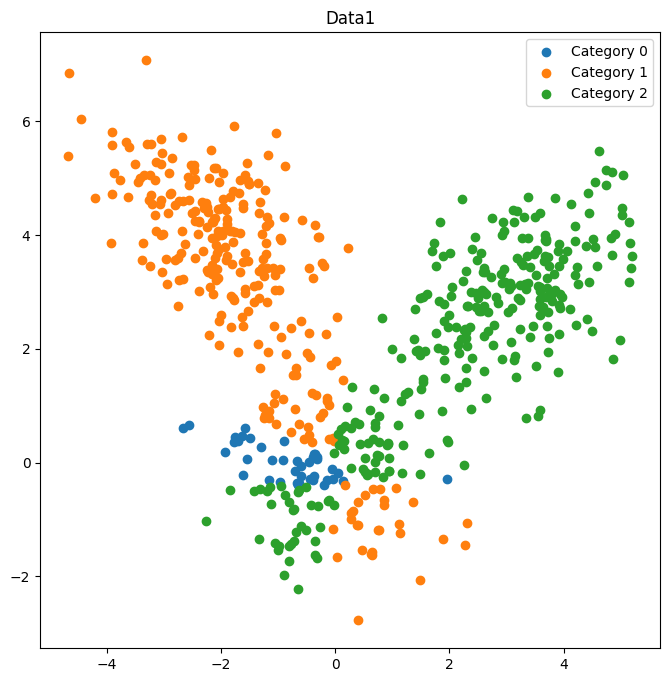

In [16]:
q, mus, sigs, phi = EM(data1, 3, 200, 0.1)
report_params(mus, sigs, phis, "Result of EM:")
plot_result(data1, q, "Data1")

## Running EM algorithm on Data2

---------------------------------------------
Result of EM:

Means:
[[0.30779371 2.3778489 ]
 [0.30779371 2.3778489 ]
 [0.30779371 2.3778489 ]]

Sigmas:
[array([[5.72535426, 0.24524671],
       [0.24524671, 9.59755254]]), array([[5.72535426, 0.24524671],
       [0.24524671, 9.59755254]]), array([[5.72535426, 0.24524671],
       [0.24524671, 9.59755254]])]

Phis:
[0.31236373 0.33011196 0.35752431]

---------------------------------------------


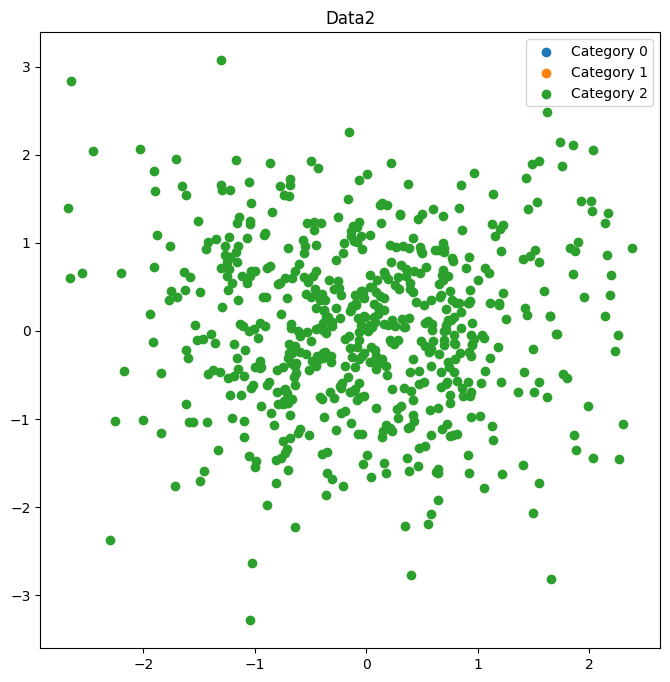

In [17]:
q, mus, sigs, phis = EM(data2, 3, 200, 0.1)
report_params(mus, sigs, phis, "Result of EM:")
plot_result(data2, q, "Data2")

# Part5: Conclusion and comparison

As you can see, the EM algorithms works better on Image1 dataset, and it doesn't work properly on Image2 dataset. The reason of this result is that points of each category in the first dataset are more closer than other categories. However, in the second dataset, the points are mixed together and it is hard to seperate them in different categories.

Worth mentioning that EM algorithms doesn't work perfectly on the first dataset too, as the size of third category is far smaller than the others. The reason behind this results is that there are some points from first and second category between the third category points, and this cause of the mentioned result.
